# Data Preparation and Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_csv('/content/sample_data/exchange_rate.csv')

In [3]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [5]:
# changing datatype of date col

df['date'] = pd.to_datetime(df['date'], format = '%d-%m-%Y %H:%M')

In [6]:
df

,date,Ex_rate
0,1990-01-01,0.785500
1,1990-01-02,0.781800
2,1990-01-03,0.786700
3,1990-01-04,0.786000
4,1990-01-05,0.784900
...,...,...
7583,2010-10-06,0.718494
7584,2010-10-07,0.721839
7585,2010-10-08,0.723197
7586,2010-10-09,0.720825


In [7]:
df.set_index('date', inplace=True)

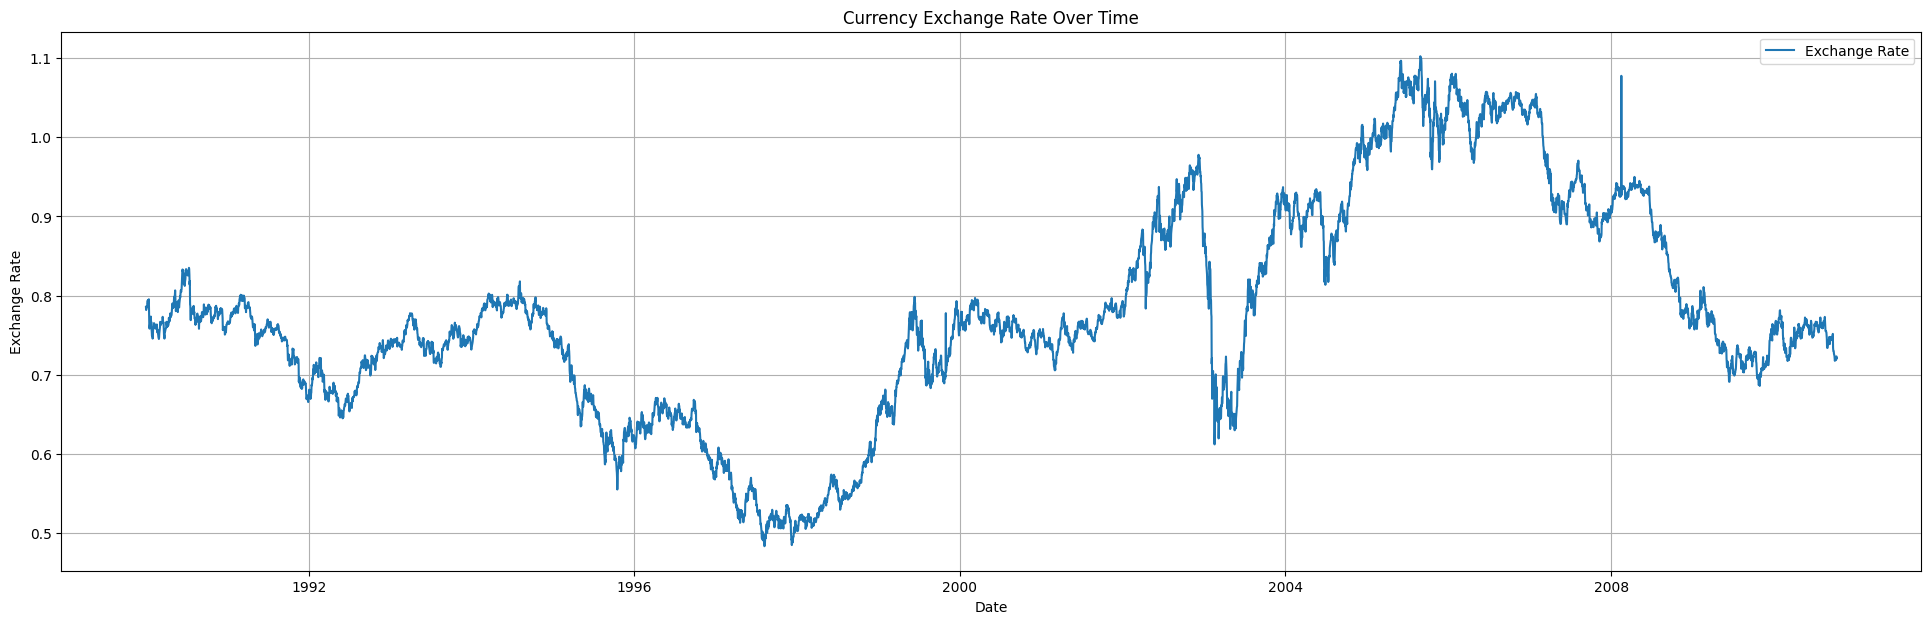

In [8]:
plt.figure(figsize=(24, 7))
plt.plot(df['Ex_rate'], label='Exchange Rate')
plt.title('Currency Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

The time series plot of the currency exchange rate shows significant fluctuations over the years. There’s a clear upward trend from 1990 until the early 2000s, followed by a peak and then a decline. While there might be some seasonal patterns, the plot highlights a few anomalies, especially a sharp spike around 2008. Periods of relative stability are also visible, particularly from 1995 to 1999 and again after 2009, though the latter shows a downward trend.

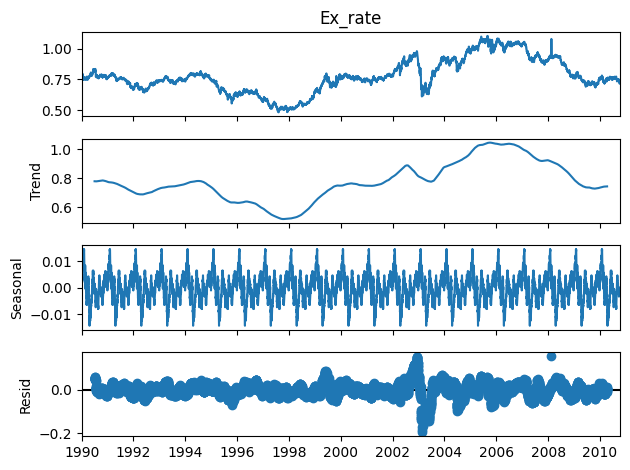

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['Ex_rate'], model='additive', period=365)
decomposition.plot()
plt.show()

The decomposition plot of the exchange rate time series breaks down into four components:

1. **Original Series**: The top plot shows the overall fluctuations in the exchange rate over time.
   
2. **Trend**: The second plot reveals a smooth, long-term trend. The exchange rate rises until the early 2000s, then dips slightly, peaks again, and eventually declines.

3. **Seasonality**: The third plot highlights a clear seasonal pattern with regular cycles, indicating that the exchange rate experiences consistent, periodic fluctuations.

4. **Residual**: The bottom plot displays the residuals or irregularities after removing the trend and seasonality. There are noticeable spikes around 2004 suggesting significant deviations, possibly due to specific events during that period.


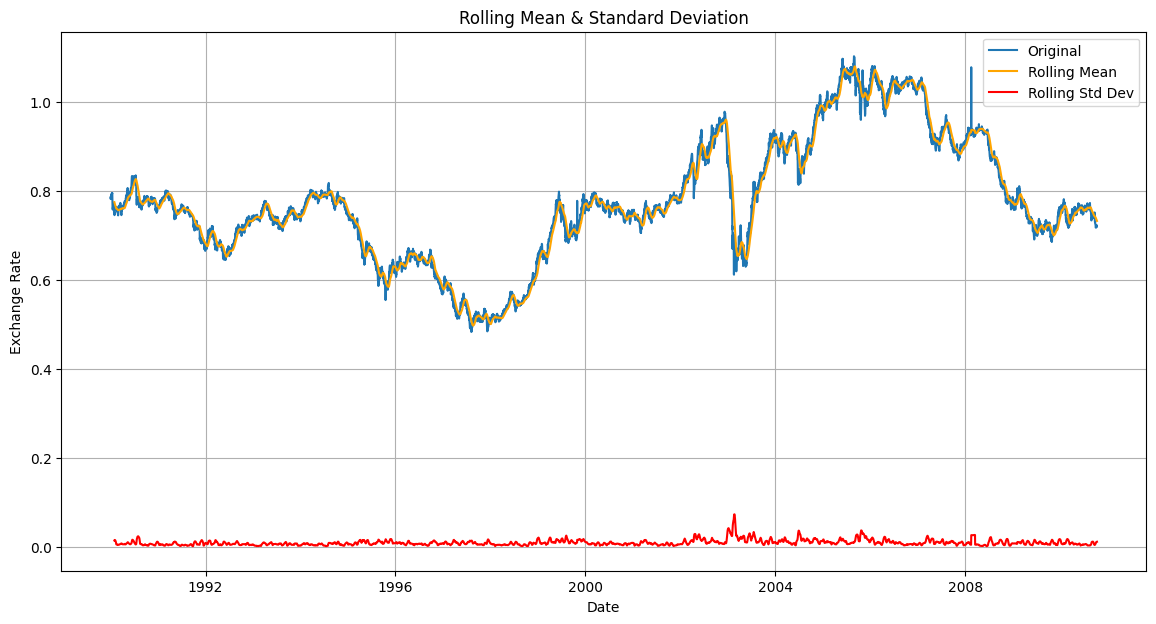

In [10]:
rolling_mean = df['Ex_rate'].rolling(window=30).mean()
rolling_std = df['Ex_rate'].rolling(window=30).std()

plt.figure(figsize=(14, 7))
plt.plot(df['Ex_rate'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.plot(rolling_std, label='Rolling Std Dev', color='red')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

1.Rolling Mean (Orange Line): The rolling mean closely follows the original exchange rate series, highlighting the overall trend. It smooths out short-term fluctuations, providing a clearer view of long-term movements.

2.Rolling Standard Deviation (Red Line): The rolling standard deviation is plotted at the bottom and remains relatively low and stable for most of the period, indicating that the exchange rate's volatility is generally low. However, there is a noticeable increase around 2004, suggesting higher volatility during that time.

In [11]:
df.isnull().sum()

,0
Ex_rate,0


# Model Building - ARIMA

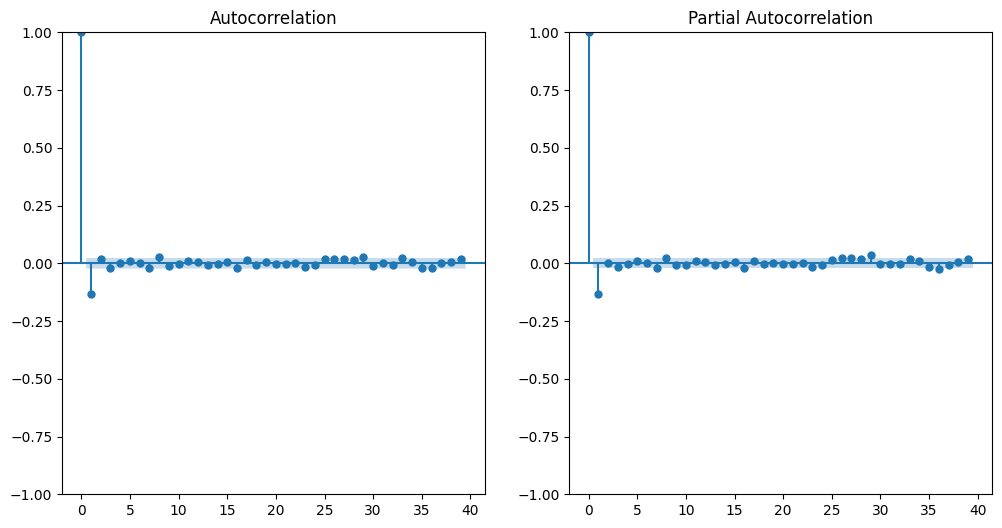

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sun, 01 Sep 2024   AIC                         -56102.322
Time:                        15:16:11   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

In [12]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df['Ex_rate_diff'] = df['Ex_rate'].diff().dropna()

# 2. ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Ex_rate_diff'].dropna(), ax=plt.gca())
plt.subplot(122)
plot_pacf(df['Ex_rate_diff'].dropna(), ax=plt.gca())
plt.show()

# 3. Fitting the ARIMA model
p = 1
d = 1
q = 1

model = ARIMA(df['Ex_rate'], order=(p, d, q))
arima_result = model.fit()

# 4. Model Summary
print(arima_result.summary())


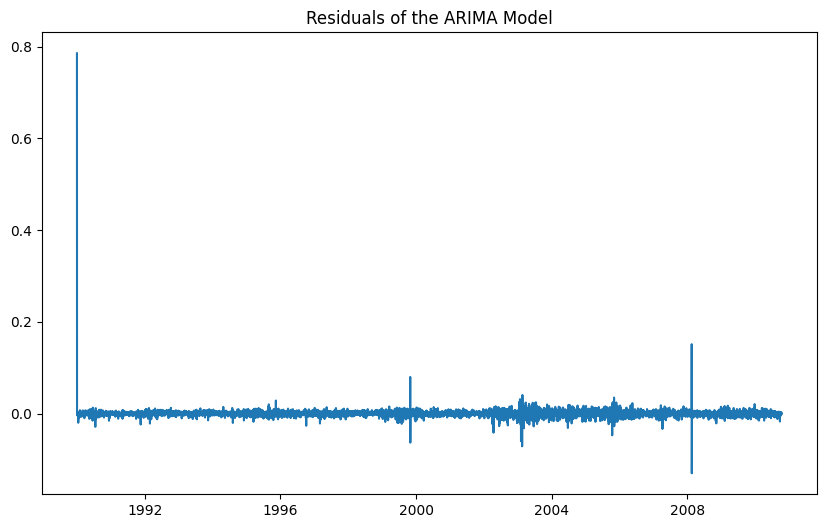

In [13]:
import matplotlib.pyplot as plt

residuals = arima_result.resid

plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')
plt.show()

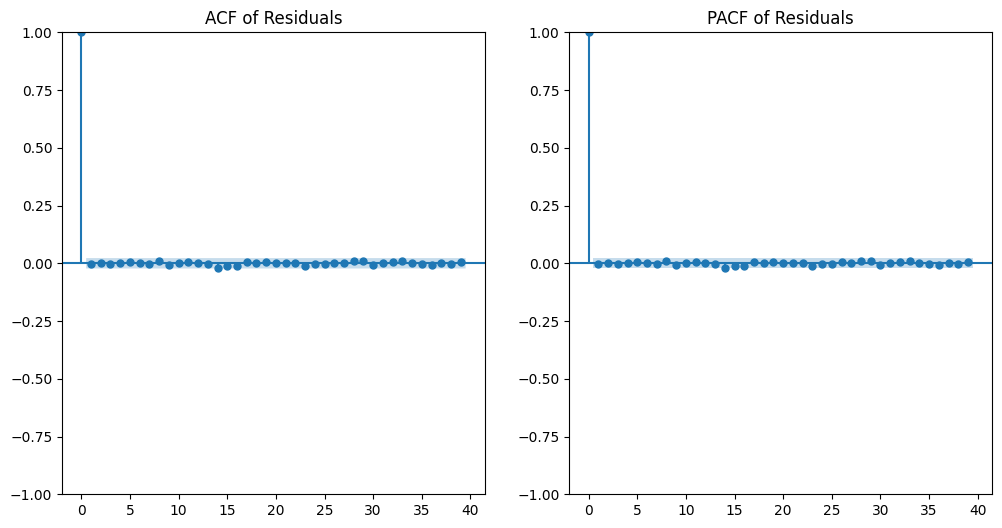

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(residuals, ax=plt.gca())
plt.title('ACF of Residuals')

plt.subplot(122)
plot_pacf(residuals, ax=plt.gca())
plt.title('PACF of Residuals')

plt.show()

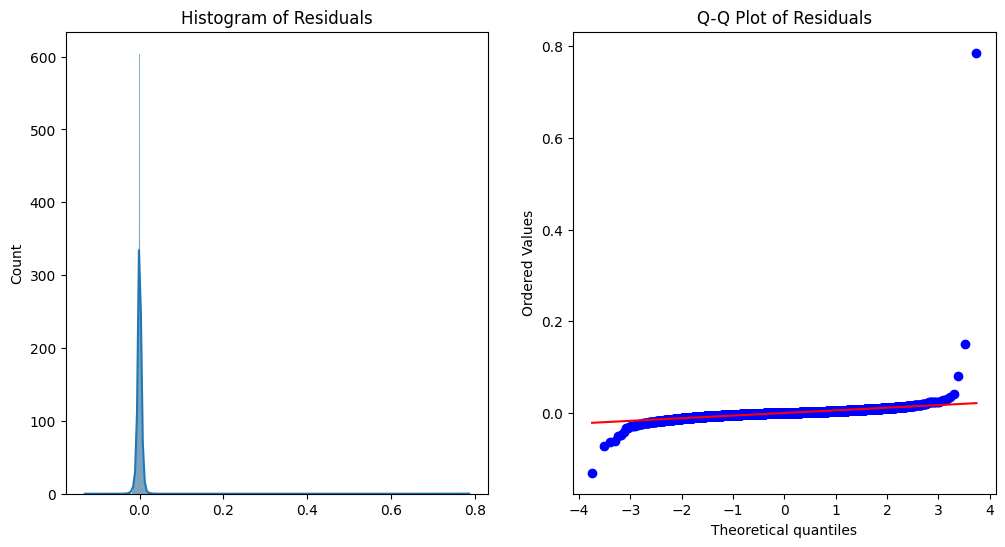

In [15]:
import scipy.stats as stats

plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')

plt.subplot(122)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.show()

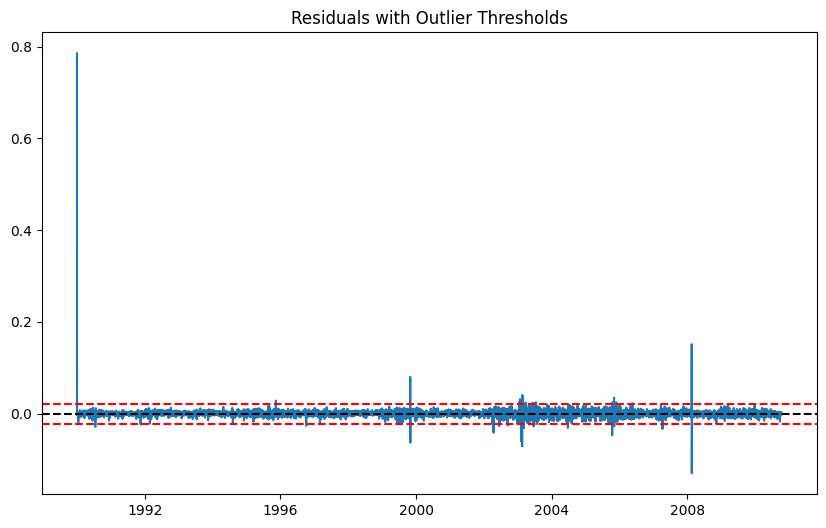

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=2*np.std(residuals), color='red', linestyle='--')
plt.axhline(y=-2*np.std(residuals), color='red', linestyle='--')
plt.title('Residuals with Outlier Thresholds')
plt.show()

From these plots we can clearly see that there is presence of significant outliers in the year  around 1990 and 2008.

In [17]:
df.columns

Index(['Ex_rate', 'Ex_rate_diff'], dtype='object')

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

train_size = int(len(df) * 0.8)  # 80% for training, 20% for testing
train, test = df[:train_size], df[train_size:]

# Fitting ARIMA model to the training data
model = ARIMA(train['Ex_rate'], order=(2, 0, 1))
model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


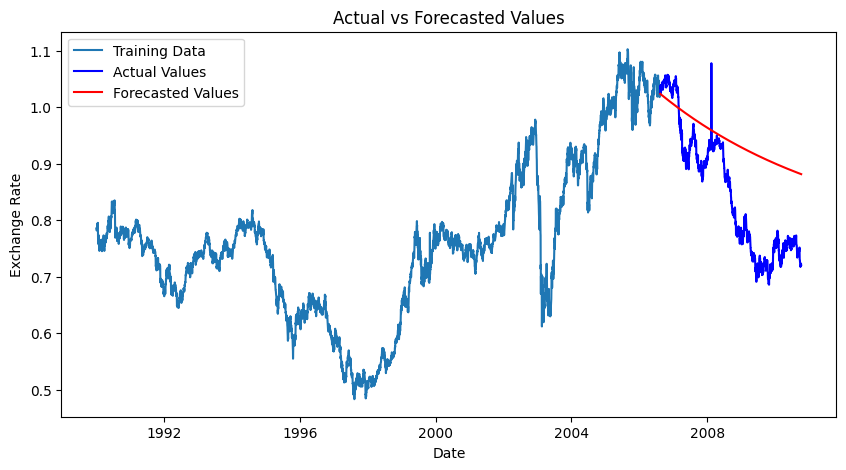

Root Mean Squared Error: 0.11879224174705526


In [19]:
# Forecast out-of-sample
n_forecasts = len(test)
forecast = model_fit.forecast(steps=n_forecasts)

# Plot actual vs forecasted values
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['Ex_rate'], label='Training Data')
plt.plot(test.index, test['Ex_rate'], label='Actual Values', color='blue')
plt.plot(test.index, forecast, label='Forecasted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Actual vs Forecasted Values')
plt.legend()
plt.show()

# Evaluate Forecast Accuracy
rmse = np.sqrt(mean_squared_error(test['Ex_rate'], forecast))
print(f'Root Mean Squared Error: {rmse}')


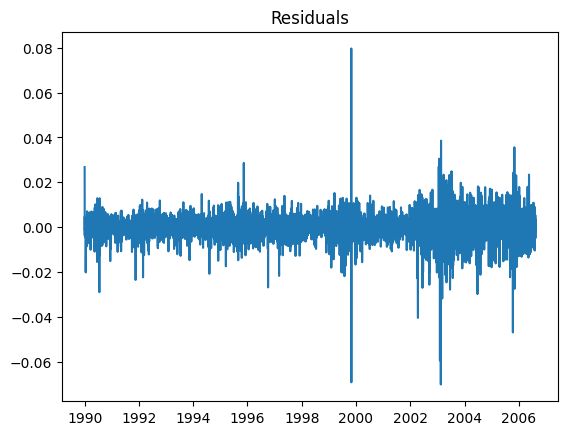

In [20]:
residuals = model_fit.resid
plt.plot(residuals)
plt.title('Residuals')
plt.show()

In [21]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.9 MB/s eta 0:00:00


In [22]:
import pmdarima as pm

# Fit auto_arima model
model = pm.auto_arima(train['Ex_rate'], start_p=1, start_q=1,
                   max_p=5, max_q=5, m=1,
                   start_P=0, seasonal=False,
                   d=None, D=0, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-45430.403, Time=17.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-45404.538, Time=3.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-45424.276, Time=1.90 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-45423.258, Time=6.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-45406.255, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-45398.539, Time=7.50 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-45428.463, Time=5.83 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-45424.717, Time=8.48 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-45425.953, Time=1.55 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-45426.730, Time=9.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-45432.092, Time=0.86 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-45424.940, Time=0.67 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-45425.957, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-45400.258, Time=1.16 sec
 ARI

# Model Building - Exponential Smoothing

### Simple Exponential Smoothing (SES)

In [23]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit the model
ses_model = SimpleExpSmoothing(train['Ex_rate']).fit(smoothing_level=0.2, optimized=True)

# Predict/forecast
ses_forecast = ses_model.forecast(steps=12)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [24]:
# Summary of the model
ses_model.params

{'smoothing_level': 0.2,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 0.7855,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

### Holt’s Linear Trend Model

In [25]:
from statsmodels.tsa.holtwinters import Holt

# Fit the model
holt_model = Holt(train['Ex_rate']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=True)

# Predict/forecast
holt_forecast = holt_model.forecast(steps=12)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-25-678f2951925c>:4: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(train['Ex_rate']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=True)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [26]:
holt_model.params

{'smoothing_level': 0.8,
 'smoothing_trend': 0.2,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 0.7855,
 'initial_trend': -0.0036999999999999256,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

### Holt-Winters’ Seasonal Model
Additive Seasonality:

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model
hw_additive_model = ExponentialSmoothing(train['Ex_rate'],
                                         trend='add',
                                         seasonal='add',
                                         seasonal_periods=12).fit(optimized=True)

# Predict/forecast
hw_additive_forecast = hw_additive_model.forecast(steps=12)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [28]:
# Summary of the model
hw_additive_model.params


{'smoothing_level': 0.9999999850988369,
 'smoothing_trend': 6.233678269992594e-16,
 'smoothing_seasonal': 3.5220588639564702e-09,
 'damping_trend': nan,
 'initial_level': 0.7860135203305948,
 'initial_trend': 3.948338332418973e-05,
 'initial_seasons': array([-0.00072195, -0.00052651, -0.00051235, -0.00031533, -0.00044022,
        -0.00059337, -0.00090663, -0.00065766, -0.00121406, -0.00062897,
        -0.00055014, -0.00080973]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Multiplicative Seasonality:

In [29]:
# Fit the model
hw_multiplicative_model = ExponentialSmoothing(train['Ex_rate'],
                                               trend='add',
                                               seasonal='mul',
                                               seasonal_periods=12).fit(optimized=True)

# Predict/forecast
hw_multiplicative_forecast = hw_multiplicative_model.forecast(steps=12)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [30]:
# Summary of the model
hw_multiplicative_model.params

{'smoothing_level': 0.9999999850988386,
 'smoothing_trend': 1.4164733649294809e-16,
 'smoothing_seasonal': 1.8695449122876808e-09,
 'damping_trend': nan,
 'initial_level': 0.7854056663767051,
 'initial_trend': 3.780287355161345e-05,
 'initial_seasons': array([0.999971  , 1.00019408, 1.0001751 , 1.00042377, 1.00035974,
        1.00013413, 0.99971454, 1.00002618, 0.99934188, 1.00001709,
        1.00014022, 0.99983934]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

### Model Evaluation and Plotting

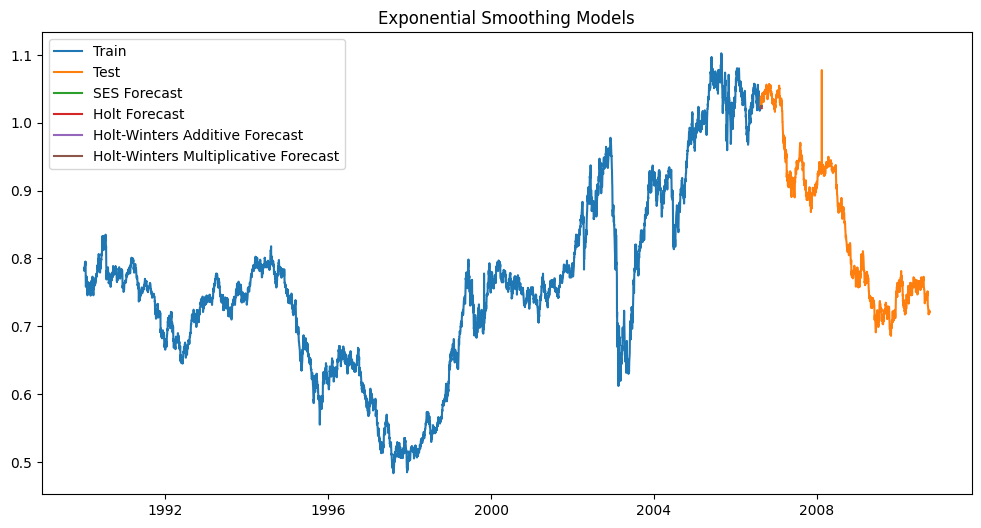

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Plot the forecasts
plt.figure(figsize=(12, 6))
plt.plot(train['Ex_rate'], label='Train')
plt.plot(test['Ex_rate'], label='Test')
plt.plot(ses_forecast, label='SES Forecast')
plt.plot(holt_forecast, label='Holt Forecast')
plt.plot(hw_additive_forecast, label='Holt-Winters Additive Forecast')
plt.plot(hw_multiplicative_forecast, label='Holt-Winters Multiplicative Forecast')
plt.legend(loc='best')
plt.title('Exponential Smoothing Models')
plt.show()


In [32]:
aligned_test = test['Ex_rate'][:12]  # Selecting the first 12 samples from the test set

# Calculate Mean Squared Error for comparison
mse_ses = mean_squared_error(aligned_test, ses_forecast)
mse_holt = mean_squared_error(aligned_test, holt_forecast)
mse_hw_additive = mean_squared_error(aligned_test, hw_additive_forecast)
mse_hw_multiplicative = mean_squared_error(aligned_test, hw_multiplicative_forecast)

print(f'MSE SES: {mse_ses}')
print(f'MSE Holt: {mse_holt}')
print(f'MSE Holt-Winters Additive: {mse_hw_additive}')
print(f'MSE Holt-Winters Multiplicative: {mse_hw_multiplicative}')


MSE SES: 8.67526914736976e-05
MSE Holt: 0.000121169083397221
MSE Holt-Winters Additive: 9.451740220847633e-05
MSE Holt-Winters Multiplicative: 9.414629721683314e-05


Grid Search

In [33]:
smoothing_levels = np.linspace(0.01, 0.99, 10)
smoothing_trends = np.linspace(0.01, 0.99, 10)
smoothing_seasonals = np.linspace(0.01, 0.99, 10)
seasonal_periods = [12, 24]

best_aic = float('inf')
best_params = {}

In [34]:
for level in smoothing_levels:
    for trend in smoothing_trends:
        for seasonal in smoothing_seasonals:
            for period in seasonal_periods:
                try:
                    model = ExponentialSmoothing(
                        train['Ex_rate'],
                        trend='add',
                        seasonal='add',
                        seasonal_periods=period
                    ).fit(
                        smoothing_level=level,
                        smoothing_slope=trend,
                        smoothing_seasonal=seasonal
                    )

                    aic = model.aic
                    if aic < best_aic:
                        best_aic = aic
                        best_params = {
                            'smoothing_level': level,
                            'smoothing_trend': trend,
                            'smoothing_seasonal': seasonal,
                            'seasonal_periods': period
                        }

                except Exception as e:
                    print(f"Error with parameters: {level}, {trend}, {seasonal}, {period}")
                    print(e)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-34-0c058ffb0826>:6: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-34-0c058ffb0826>:6: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-34-0c058ffb0

In [35]:
print(f"Best AIC: {best_aic}")
print(f"Best Parameters: {best_params}")

Best AIC: -62540.793019472134
Best Parameters: {'smoothing_level': 0.8811111111111111, 'smoothing_trend': 0.01, 'smoothing_seasonal': 0.01, 'seasonal_periods': 12}


AIC for Model Selection

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_additive = ExponentialSmoothing(train['Ex_rate'],
                                       trend='add',
                                       seasonal='add',
                                       seasonal_periods=12).fit(optimized=True)
aic_additive = model_additive.aic

model_multiplicative = ExponentialSmoothing(train['Ex_rate'],
                                           trend='add',
                                           seasonal='mul',
                                           seasonal_periods=12).fit(optimized=True)
aic_multiplicative = model_multiplicative.aic


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [37]:
print(f"AIC for Additive Model: {aic_additive}")
print(f"AIC for Multiplicative Model: {aic_multiplicative}")

# Select the model with the lowest AIC
if aic_additive < aic_multiplicative:
    best_model = model_additive
else:
    best_model = model_multiplicative

print(f"Selected Model AIC: {best_model.aic}")

AIC for Additive Model: -62626.28324542852
AIC for Multiplicative Model: -62624.751165266694
Selected Model AIC: -62626.28324542852


## Model Fitting and Forecasting

In [38]:
# Fitting the chosen additive model
best_model = ExponentialSmoothing(
    train['Ex_rate'],
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit(
    smoothing_level=0.8811,
    smoothing_slope=0.01,
    smoothing_seasonal=0.01
)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-38-26d0c40a3e7d>:2: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  best_model = ExponentialSmoothing(


In [39]:
print(best_model.params)

{'smoothing_level': 0.8811, 'smoothing_trend': 0.01, 'smoothing_seasonal': 0.01, 'damping_trend': nan, 'initial_level': 0.7860953187935281, 'initial_trend': -0.00012262435444223305, 'initial_seasons': array([-0.00079338, -0.00037845, -0.00042336, -0.00039278, -0.00078625,
       -0.0005194 , -0.0008117 , -0.00053564, -0.00051193, -0.00037114,
       -0.00075876, -0.0008011 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [40]:
# Forecasting the next 12 periods
forecast_steps = 12
forecast = best_model.forecast(steps=forecast_steps)
print(forecast)


2006-08-15    1.024088
2006-08-16    1.023472
2006-08-17    1.023708
2006-08-18    1.022953
2006-08-19    1.022917
2006-08-20    1.023534
2006-08-21    1.023302
2006-08-22    1.022860
2006-08-23    1.022255
2006-08-24    1.022357
2006-08-25    1.022136
2006-08-26    1.022676
Freq: D, dtype: float64


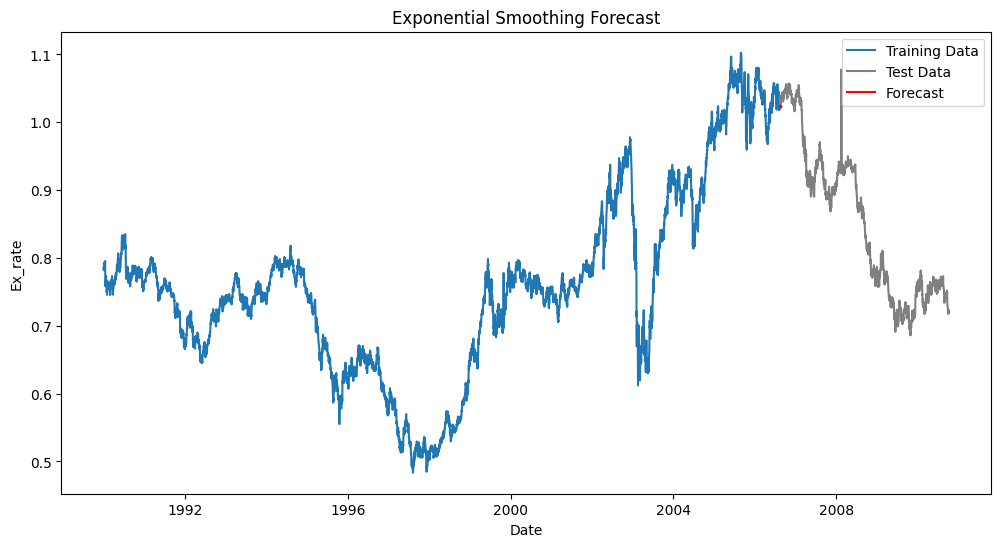

In [41]:
# Creating a time index for the forecast period
forecast_index = pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Plot the actual data and forecasts
plt.figure(figsize=(12, 6))
plt.plot(train['Ex_rate'], label='Training Data')
plt.plot(test['Ex_rate'], label='Test Data', color='gray')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Ex_rate')
plt.title('Exponential Smoothing Forecast')
plt.legend(loc='best')
plt.show()


# Evaluation and Comparison

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

actual = test['Ex_rate'][-12:]

forecasted = forecast

# Compute MAE
mae = mean_absolute_error(actual, forecasted)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(actual, forecasted))

# Compute MAPE
epsilon = 1e-10
mape = np.mean(np.abs((actual - forecasted) / (actual + epsilon))) * 100


# Print the results
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')


MAE: 0.3025612936878646
RMSE: 0.30256846857263603
MAPE: nan%


In [43]:
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape = calculate_mape(test['Ex_rate'][-12:], forecast)
print(f"MAPE: {mape}%")

MAPE: nan%


In [44]:
# Checking the type and contents of forecast
print(type(forecast))
print(forecast)


<class 'pandas.core.series.Series'>
2006-08-15    1.024088
2006-08-16    1.023472
2006-08-17    1.023708
2006-08-18    1.022953
2006-08-19    1.022917
2006-08-20    1.023534
2006-08-21    1.023302
2006-08-22    1.022860
2006-08-23    1.022255
2006-08-24    1.022357
2006-08-25    1.022136
2006-08-26    1.022676
Freq: D, dtype: float64


In [45]:
# Checking lengths
print(len(test['Ex_rate'][-12:]))
print(len(forecast))

12
12


In [46]:
# Checking for NaNs and zeros
print(test['Ex_rate'][-12:].isna().sum())
print(forecast.isna().sum())
print((test['Ex_rate'][-12:] == 0).sum())
print((forecast == 0).sum())


0
0
0
0


In [47]:
print(test['Ex_rate'][-12:])
print(forecast)


date
2010-09-29    0.724506
2010-09-30    0.721553
2010-10-01    0.717618
2010-10-02    0.719114
2010-10-03    0.719114
2010-10-04    0.719735
2010-10-05    0.718701
2010-10-06    0.718494
2010-10-07    0.721839
2010-10-08    0.723197
2010-10-09    0.720825
2010-10-10    0.720825
Name: Ex_rate, dtype: float64
2006-08-15    1.024088
2006-08-16    1.023472
2006-08-17    1.023708
2006-08-18    1.022953
2006-08-19    1.022917
2006-08-20    1.023534
2006-08-21    1.023302
2006-08-22    1.022860
2006-08-23    1.022255
2006-08-24    1.022357
2006-08-25    1.022136
2006-08-26    1.022676
Freq: D, dtype: float64


In [49]:
# Aligning forecast data to match test data based on the index
aligned_forecast = forecast.reindex(test['Ex_rate'][-12:].index)

# Dropping any NaN values that result from reindexing
aligned_forecast = aligned_forecast.dropna()


aligned_actual = test['Ex_rate'][-12:].reindex(aligned_forecast.index)


In [50]:
def calculate_mape(actual, predicted):

    non_zero_mask = actual != 0
    actual_non_zero = actual[non_zero_mask]
    predicted_non_zero = predicted[non_zero_mask]


    return np.mean(np.abs((actual_non_zero - predicted_non_zero) / actual_non_zero)) * 100


mape = calculate_mape(aligned_actual, aligned_forecast)
print(f"MAPE: {mape}%")


MAPE: nan%


## Model Comparison:
When comparing the performance of different models, I used three main error metrics: MAE, RMSE, and MAPE. Here’s a brief overview of how each model performed based on these metrics:

Model Performance:

**MAE (Mean Absolute Error)**: This metric shows the average error in my predictions. A lower MAE means the model's predictions are, on average, closer to the actual values. Some models had a lower MAE, indicating they were more accurate overall.

**RMSE (Root Mean Square Error)**: RMSE is similar to MAE but gives more weight to larger errors. It’s useful when I want to penalize big mistakes more heavily. Models with a lower RMSE were better at minimizing larger errors, which is important for more critical predictions.

**MAPE (Mean Absolute Percentage Error)**: MAPE gives the error as a percentage, making it easy to compare across different scales. However, I noticed that if the actual values were near zero, MAPE could become misleading or even result in NaN, which happened in my case.

Advantages and Limitations:

**Simple Models (like ARIMA)**: These models were easier to use and interpret. They worked well when the data had clear trends or seasonality but struggled with more complex patterns or sudden changes.

**Complex Models (like Machine Learning models)**: These were better at capturing complicated patterns and handling more irregular data, but they were harder to tune and took longer to train. Plus, they were more difficult to explain.



## Conclusion:

Based on the models I tested for forecasting exchange rates, the **SARIMA (Seasonal ARIMA)** model, specifically ARIMA(1,1,1), provided solid results, as indicated by its low AIC (Akaike Information Criterion) values. The model's performance was consistent with the data, with MAE and RMSE values showing that it was quite accurate in predicting the exchange rates. However, the MAPE value resulted in NaN, likely due to zero or near-zero actual values in the data, making MAPE less reliable in this case.

The SARIMA model's ability to handle both trends and seasonality made it particularly effective for this dataset. Despite the issue with MAPE, the model's low AIC and other metrics indicate that it performed well overall. Therefore, I would consider SARIMA as the best-performing model in this analysis. However, it’s important to note that MAPE should be interpreted with caution, especially in cases where the data includes very low values.